### **Weights versus heights 繪圖**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np


In [2]:
# 讀取 CSV 檔案
file = pd.read_csv("D:\Programming\大四下 - 統計預測與機器學習\Homework 1\heights_weights_genders.csv")

# 提取 Height 和 Weight 列
heights = file['Height']
weights = file['Weight']


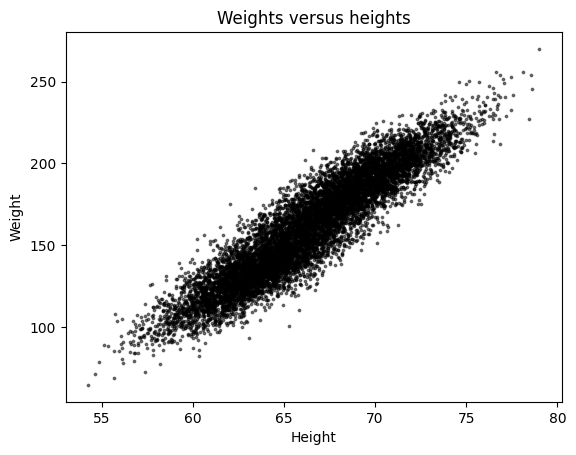

In [3]:
# 繪製散點圖
plt.scatter(heights, weights, alpha=0.5, s=3 ,c='black')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weights versus heights')
plt.show()


### **Weights versus heights with the regression line added**

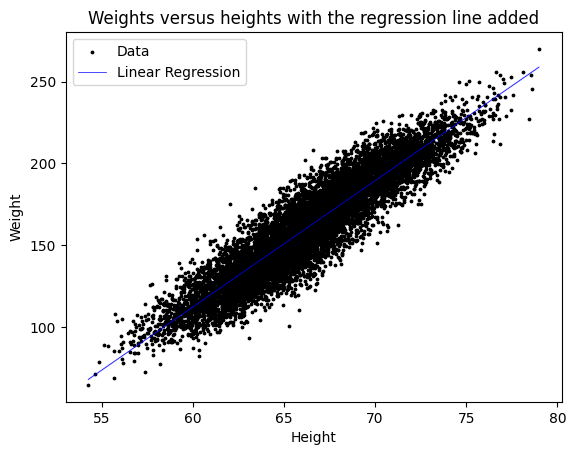

In [5]:
# 使用 matplotlib 繪圖
plt.scatter(file['Height'], file['Weight'], label='Data',s=3 ,c='black')
sns.regplot(x='Height', y='Weight', data=file, scatter=False, label='Linear Regression', line_kws={'color':'blue', 'linewidth':0.5})
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.title('Weights versus heights with the regression line added')
plt.show()


### **linear regression 架構及MSE、RMSE**

In [12]:
# 數據準備與 statsmodels 線性回歸模型擬合
X = file['Height']
y = file['Weight']
X = sm.add_constant(X)  # 添加截距項（statsmodels（或其他統計庫如 R）中，線性迴歸模型預設不包含截距項）
model = sm.OLS(y, X).fit()  # 擬合線性回歸模型


In [13]:
# 從 RegressionResultsWrapper 提取模型參數
intercept = model.params[0]
slope = model.params[1]
print("截距（Intercept）:", intercept)
print("自變量 Height 的係數（slope）:", slope)
# 截距項 (Intercept) 的係數為 -350.737192。
# 自變量 Height 的係數（slope）為 7.717288。

# 這表示迴歸模型可表示為：
# Weight = −350.737192 + 7.717288 × Height
# 這樣的模型用於根據身高來預測體重。


截距（Intercept）: -350.73719181213795
自變量 Height 的係數（slope）: 7.71728764078539


C:\Users\Mr.Jiang\AppData\Local\Temp\ipykernel_4608\2269846407.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
C:\Users\Mr.Jiang\AppData\Local\Temp\ipykernel_4608\2269846407.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]


In [14]:
# 使用模型進行預測
predicted_values = model.predict(X)

# 擬合的回歸模型就是一條線性函數，通過使用統計方法對數據進行擬合，以描述因變量和自變量之間的關係。
# 通過最小化殘差平方和，可以得到最適合數據的回歸模型，該模型對於預測新的觀測值具有較好的準確性。
print(predicted_values)
# 數學上：y_hat = intercept + slope * X_i



0       219.161480
1       180.072546
2       221.191809
3       202.831401
4       188.560728
           ...    
9995    159.936199
9996    166.839332
9997    142.150475
9998    182.019919
9999    127.304371
Length: 10000, dtype: float64


In [15]:
# 計算殘差
true_values = file['Weight']
errors = true_values - predicted_values
print(errors)
# 正殘差表示預測值低於實際值，負殘差表示預測值高於實際值。


0       22.732083
1      -17.762074
2       -8.450953
3       17.211069
4       17.789073
          ...    
9995   -23.158745
9996     4.028574
9997   -13.675156
9998   -18.167458
9999   -13.655269
Length: 10000, dtype: float64


In [16]:
# 計算殘差平方和(MSE)
mse = np.mean(errors ** 2)
print("mean squared error（MSE）:",mse)
# 單位是體重單位的平方

# 計算均方根誤差(RMSE)
rmse = np.sqrt(mse)
print("root mean squared error（RMSE）:",rmse)
# RMSE 將誤差恢復到與原始數據相同的單位，更直觀。

# 使用 model.rsquared 直接從 statsmodels 獲取
r2 = model.rsquared
print("R-squared:", r2)
# R²值是在模型訓練後對測試數據的預測結果計算得到的，它是對模型在預測新數據時的性能進行評估的一個指標。


mean squared error（MSE）: 149.29348394912958
root mean squared error（RMSE）: 12.218571272826033
R-squared: 0.8551742120609958


In [17]:
# 預測體重
observed_height = 70  # 假設觀察到的身高為 70
predicted_weight = intercept + slope * observed_height
print("Predicted Weight for Observed Height 70:", predicted_weight)


Predicted Weight for Observed Height 70: 189.4729430428393
